In [1]:
from plotly import express as px
# Other potentially useful libraries
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

### LADOT Ridership

In [2]:
ladot = pd.DataFrame()

In [3]:
years = np.full(12, 19)
years = np.append(years, np.full(12, 20))
years = np.append(years, np.full(10, 21))

In [4]:
years

array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21])

In [5]:
ladot["year"] = years

In [6]:
months = np.arange(1, 13)
months = np.append(months, np.arange(1, 13))
months = np.append(months, np.arange(1, 11))

In [7]:
ladot["month"] = months

In [8]:
ladot.head()

,year,month
0,19,1
1,19,2
2,19,3
3,19,4
4,19,5


In [9]:
dmonths = {
    1 : "Jan",
    2 : "Feb",
    3 : "Mar",
    4 : "Apr",
    5 : "May",
    6 : "Jun",
    7 : "Jul",
    8 : "Aug",
    9 : "Sep",
    10 : "Oct",
    11 : "Nov",
    12 : "Dec"
}

date = np.array([])
for row in ladot.index:
    temp_date = dmonths[ladot["month"][row]] + ". " + str(ladot["year"][row])
    date = np.append(date, temp_date)

In [10]:
ladot["date"] = date

In [11]:
ladot.head()

,year,month,date
0,19,1,Jan. 19
1,19,2,Feb. 19
2,19,3,Mar. 19
3,19,4,Apr. 19
4,19,5,May. 19


In [12]:
line431 = np.array(['3688', '3235', '3544', '3030', '2956', '3005', '4017', '4282', '4455', '3909', '3056', '4153', '2651', 
                    '1772','775', '68', '59', '112', '127', '108', '130', '211', '164', '62', '96', '167', '216', '167', 
                    '150', '595', '343', '365', '517', '513'])
line431 = line431.astype(float)

In [13]:
line534 = np.array(['2666', '2427', '2491', '2559', '2515', '2506', '2577', '2393', '2269', '2468', '2419', '2083', 
                    '2227', '1705', '1029', '71', '69', '151', '176', '197', '225', '196', '163', '199', '249', '196', 
                    '246', '268', '304', '395', '504', '810', '983', '992'])
line534 = line534.astype(float)

In [14]:
line573 = np.array(['16671', '16525', '17893', '18752', '19923', '16984', '17959', '18062', '16378', '18725', 
                    '15860', '12768', '15660', '13274', '7428', '1076', '1324', '2096', '2529', '2561', '2849', 
                    '3012', '2807', '2196', '2188', '2488', '3219', '3334', '3298', '4032', '3955', '4961', '5821', '5873'])
line573 = line573.astype(float)

In [15]:
ladot["line 431"] = line431
ladot["line 534"] = line534
ladot["line 573"] = line573

In [16]:
total = np.array([])
for row in ladot.index:
    allriders = ladot["line 431"][row] + ladot["line 534"][row] + ladot["line 573"][row]
    total = np.append(total, allriders)

In [17]:
ladot["total ridership"] = total

In [18]:
ladot.head()

,year,month,date,line 431,line 534,line 573,total ridership
0,19,1,Jan. 19,3688.0,2666.0,16671.0,23025.0
1,19,2,Feb. 19,3235.0,2427.0,16525.0,22187.0
2,19,3,Mar. 19,3544.0,2491.0,17893.0,23928.0
3,19,4,Apr. 19,3030.0,2559.0,18752.0,24341.0
4,19,5,May. 19,2956.0,2515.0,19923.0,25394.0


In [19]:
ladot["date"][row]

'Oct. 21'

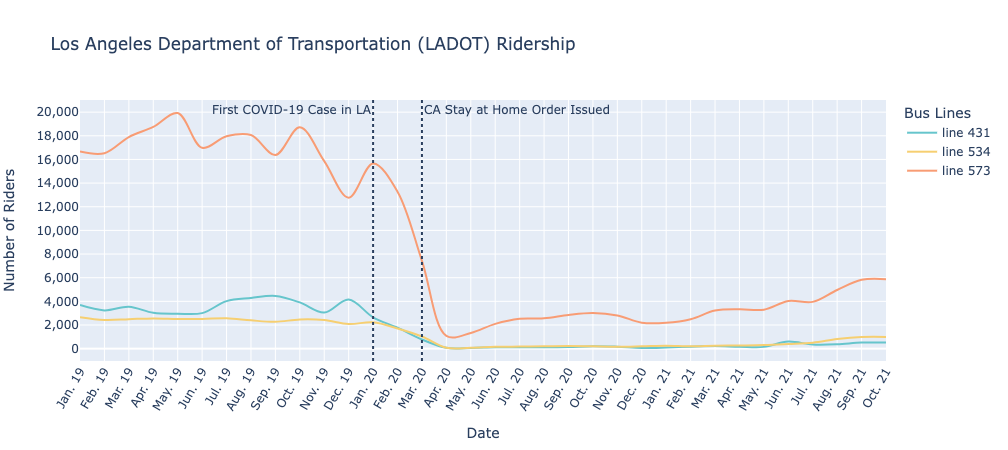

In [21]:
# import plotly as px


fig = px.line(ladot, 
              labels={
                     "value": "Number of Riders",
                     "date": "Date",
                  "variable" : "Bus Lines"}, 
              title="Los Angeles Department of Transportation (LADOT) Ridership", 
              x="date", 
              y=["line 431", "line 534", "line 573"], line_shape="spline",
              color_discrete_sequence=px.colors.qualitative.Pastel,
              width=1000, height=450)

#fig.update(layout={"title": {"x": 0.45, "y": 0.8}})
fig.update_xaxes(tickangle=300)
fig.add_vline(x=12, line_dash="dot", annotation_text="First COVID-19 Case in LA", annotation_position="top left")
fig.add_vline(x=14, line_dash="dot", annotation_text="CA Stay at Home Order Issued", annotation_position="top right")
fig.update_yaxes(nticks=20)
fig.update_layout(yaxis_tickformat = ',')
#fig.update_yaxes(tickvals=["0", "2,000", "4,000", "6,000", "8,000", "10,000", "12,000", "14,000", "16,000", "18,000", "20,000"])
#fig.update_layout(hovermode="x")

config = {'responsive': True}

fig.show(config=config)

In [22]:
import plotly.graph_objects as go
from plotly.io import write_html
# Writing to an html file!
write_html(fig, "ladot-ridership.html")

In [23]:
transports = pd.DataFrame()
transports["date"] = date
transports.head()

,date
0,Jan. 19
1,Feb. 19
2,Mar. 19
3,Apr. 19
4,May. 19


In [24]:
transports["LADOT"] = total

In [25]:
transports.head()

,date,LADOT
0,Jan. 19,23025.0
1,Feb. 19,22187.0
2,Mar. 19,23928.0
3,Apr. 19,24341.0
4,May. 19,25394.0


### AVTA Ridership

In [26]:
avta = pd.DataFrame()

line786 = np.array([3600, 2930, 3289, 4070, 4206, 1876, 1482, 3261, 3209, 3285, 2990, 2388, 
                  3005, 2991, 1762, 0, 230, 780, 468, 0, 0, 473, 760, 866, 954, 1047, 1262,
                  42, 0, 78, 94, 0, 62, 59])
avta["date"] = date
avta["line 786"] = line786

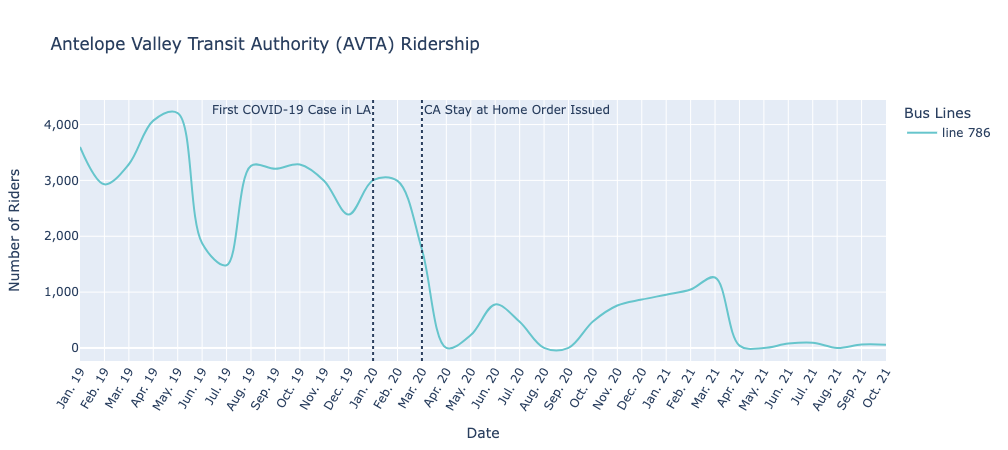

In [27]:
fig2 = px.line(avta, 
              labels={
                     "value": "Number of Riders",
                     "date": "Date",
                  "variable" : "Bus Lines"}, 
              title="Antelope Valley Transit Authority (AVTA) Ridership", 
              x="date", 
              y=["line 786"], line_shape="spline",
              color_discrete_sequence=px.colors.qualitative.Pastel,
              width=1000, height=450)

#fig2.update(layout={"title": {"x": 0.45, "y": 0.8}})
fig2.update_xaxes(tickangle=300)
#fig2.add_vline(x=12, line_dash="dot", annotation_text="First COVID-19 Case in LA")
fig2.add_vline(x=12, line_dash="dot", annotation_text="First COVID-19 Case in LA", annotation_position="top left")
fig2.add_vline(x=14, line_dash="dot", annotation_text="CA Stay at Home Order Issued", annotation_position="top right")
#fig.add_vline(x="Jan-2020", line_dash="dash", annotation_text="First Case of COVID-19 in USA", annotation_position="top right")

fig2.update_yaxes(nticks=5)
fig2.update_layout(yaxis_tickformat = ',')
#fig.update_yaxes(tickvals=["0", "2,000", "4,000", "6,000", "8,000", "10,000", "12,000", "14,000", "16,000", "18,000", "20,000"])
#fig.update_layout(hovermode="x")

config = {'responsive': True}

fig2.show(config=config)

In [28]:
write_html(fig2, "avta-ridership.html") # writing to html file

In [29]:
transports["AVTA"] = line786

In [30]:
transports.head()

,date,LADOT,AVTA
0,Jan. 19,23025.0,3600
1,Feb. 19,22187.0,2930
2,Mar. 19,23928.0,3289
3,Apr. 19,24341.0,4070
4,May. 19,25394.0,4206


### Santa Clarita Transit Ridership

In [31]:
sct792 = np.array([249, 338, 262, 299, 306, 168, 316, 342, 372, 322, 301, 286,
                     312, 288, 187, 90, 154, 161, 99, 120, 134, 192, 159, 154,
                     189, 155, 179, 206, 164, 233, 213, 190, 161, 182])

sct797 = np.array([6939, 6907, 6834, 7200, 7021, 5090, 6655, 6678, 6562, 7725, 5965, 5323, 
                   7071, 6298, 3739, 351, 426, 912, 972, 1047, 1159, 1375, 1045, 977, 
                   1170, 1279, 1474, 1275, 1440, 1949, 1892, 2259, 1827, 2900])

all_sct_riders = sct792 + sct797

In [32]:
sct = pd.DataFrame()
sct["date"] = date
sct["line 792"] = sct792
sct["line 797"] = sct797
sct["total ridership"] = all_sct_riders

In [33]:
sct.head()

,date,line 792,line 797,total ridership
0,Jan. 19,249,6939,7188
1,Feb. 19,338,6907,7245
2,Mar. 19,262,6834,7096
3,Apr. 19,299,7200,7499
4,May. 19,306,7021,7327


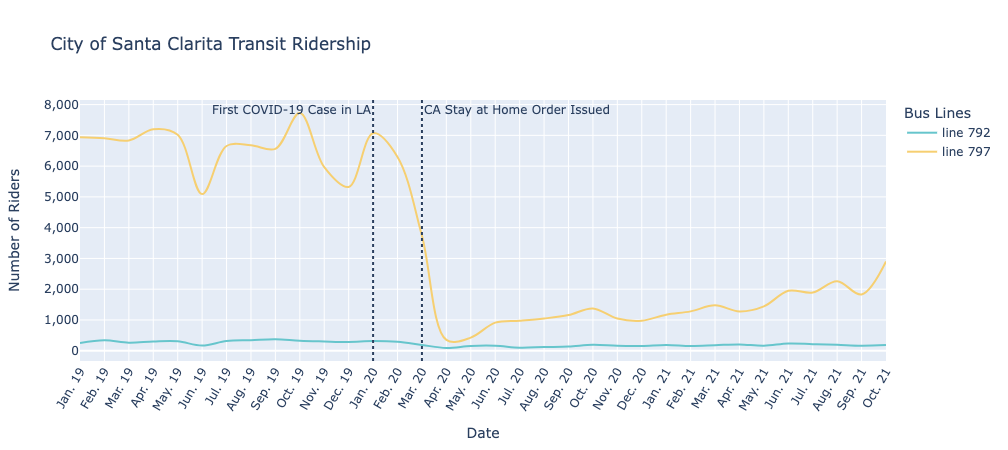

In [34]:
fig3 = px.line(sct, 
              labels={
                     "value": "Number of Riders",
                     "date": "Date",
                  "variable" : "Bus Lines"}, 
              title="City of Santa Clarita Transit Ridership", 
              x="date", 
              y=["line 792", "line 797"], line_shape="spline",
              color_discrete_sequence=px.colors.qualitative.Pastel,
              width=1000, height=450)

#fig3.update(layout={"title": {"x": 0.3, "y": 0.8}})
fig3.update_xaxes(tickangle=300)
#fig3.add_vline(x=12, line_dash="dot", annotation_text="First COVID-19 Case in LA")
fig3.add_vline(x=12, line_dash="dot", annotation_text="First COVID-19 Case in LA", annotation_position="top left")
fig3.add_vline(x=14, line_dash="dot", annotation_text="CA Stay at Home Order Issued", annotation_position="top right")
#fig.add_vline(x="Jan-2020", line_dash="dash", annotation_text="First Case of COVID-19 in USA", annotation_position="top right")

fig3.update_yaxes(nticks=15)
fig3.update_layout(yaxis_tickformat = ',')
#fig.update_yaxes(tickvals=["0", "2,000", "4,000", "6,000", "8,000", "10,000", "12,000", "14,000", "16,000", "18,000", "20,000"])
#fig.update_layout(hovermode="x")

config = {'responsive': True}

fig3.show(config=config)

In [35]:
write_html(fig3, "sct-ridership.html")

In [36]:
transports["Santa Clarita Transit"] = all_sct_riders
transports.head()

,date,LADOT,AVTA,Santa Clarita Transit
0,Jan. 19,23025.0,3600,7188
1,Feb. 19,22187.0,2930,7245
2,Mar. 19,23928.0,3289,7096
3,Apr. 19,24341.0,4070,7499
4,May. 19,25394.0,4206,7327


### Santa Monica Big Blue Bus Ridership

In [37]:
bbb = pd.read_csv("bbb-ridership.csv")

In [38]:
# Route_Number #1
route1 = bbb[bbb["ROUTE_NUMBER"] == 1]
route2 = bbb[bbb["ROUTE_NUMBER"] == 2]
route3 = bbb[bbb["ROUTE_NUMBER"] == 3]
route8 = bbb[bbb["ROUTE_NUMBER"] == 8]
route12 = bbb[bbb["ROUTE_NUMBER"] == 12]

In [39]:
bbbdates = route1["SCHEDULE"].unique()

In [40]:
bbbdates

array(['Sep-18', 'Mar-19', 'Jun-19', 'Aug-19', 'Feb-20', 'May-20',
       'Sep-20', 'Apr-21', 'Aug-21'], dtype=object)

In [41]:
# 9 x 3 array of number of saturdays, sundays
# and weekdays in the following months
wdays = np.zeros(9*3).reshape(9, 3)

# September 2018
# 0 - Sat; 1 - Sun; 2 - Weekday
wdays[0][0] = 5
wdays[0][1] = 5
wdays[0][2] = 20

# March 2019
wdays[1][0] = 5
wdays[1][1] = 5
wdays[1][2] = 21

# June 2019
wdays[2][0] = 5
wdays[2][1] = 5
wdays[2][2] = 20

# August 2019
wdays[3][0] = 5
wdays[3][1] = 4
wdays[3][2] = 22

# February 2020
wdays[4][0] = 5
wdays[4][1] = 4
wdays[4][2] = 20

# May 2020
wdays[5][0] = 5
wdays[5][1] = 5
wdays[5][2] = 21

# September 2020
wdays[6][0] = 4
wdays[6][1] = 4
wdays[6][2] = 22

# April 2021
wdays[7][0] = 4
wdays[7][1] = 4
wdays[7][2] = 22

# August 2021
wdays[8][0] = 4
wdays[8][1] = 5
wdays[8][2] = 22

In [42]:
line1 = pd.DataFrame()
riders = np.array([])

count = 0
for date in bbbdates:
    num_riders = 0
    temp = route1[route1["SCHEDULE"] == date].groupby("SERVICE_DAY").sum().reset_index()
    
    for i in range(len(temp)):
        if temp.iloc[i][0] == "Saturday":
            num_riders += (temp.iloc[i][5]*wdays[count][0])
        elif temp.iloc[i][0] == "Sunday":
            num_riders += (temp.iloc[i][5]*wdays[count][1])
        elif temp.iloc[i][0] == "Weekday":
            num_riders += (temp.iloc[i][5]*wdays[count][2])
            
    count += 1
            
    riders = np.append(riders, num_riders)
    
line1["date"] = bbbdates
line1["total_ridership"] = riders

In [43]:
line1

,date,total_ridership
0,Sep-18,147960.00
1,Mar-19,162032.48
2,Jun-19,155850.80
3,Aug-19,170529.38
4,Feb-20,89532.04
5,May-20,83058.04
6,Sep-20,78334.30
7,Apr-21,80709.32
8,Aug-21,97520.48


In [44]:
dates = ["Jan-19", "Feb-19", "Mar-19", "Apr-19", "May-19", "Jun-19", "Jul-19", "Aug-19", "Sep-19", "Oct-19", "Nov-19", "Dec-19",
        "Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20", "Jul-20", "Aug-20", "Sep-20", "Oct-20", "Nov-20", "Dec-20",
        "Jan-21", "Feb-21", "Mar-21", "Apr-21", "May-21", "Jun-21", "Jul-21", "Aug-21", "Sep-21", "Oct-21"]

In [45]:
l1 = np.zeros(len(dates))

for d in range(len(dates)): 
    for idx in range(9):
    
        if line1["date"][idx] == dates[d]:
            l1[d] = line1["total_ridership"][idx]

In [46]:
l1

array([     0.  ,      0.  , 162032.48,      0.  ,      0.  , 155850.8 ,
            0.  , 170529.38,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,  89532.04,      0.  ,      0.  ,  83058.04,      0.  ,
            0.  ,      0.  ,  78334.3 ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,  80709.32,      0.  ,      0.  ,
            0.  ,  97520.48,      0.  ,      0.  ])

In [47]:
for i, n in enumerate(l1):
    if n == 0:
        l1[i] = np.NaN
        
l1

array([      nan,       nan, 162032.48,       nan,       nan, 155850.8 ,
             nan, 170529.38,       nan,       nan,       nan,       nan,
             nan,  89532.04,       nan,       nan,  83058.04,       nan,
             nan,       nan,  78334.3 ,       nan,       nan,       nan,
             nan,       nan,       nan,  80709.32,       nan,       nan,
             nan,  97520.48,       nan,       nan])

In [48]:
smbbb = pd.DataFrame()
smbbb["date"] = dates
smbbb["line 1"] = l1

In [49]:
line2 = pd.DataFrame()
riders = np.array([])

count = 0
for date in bbbdates:
    num_riders = 0
    temp = route2[route2["SCHEDULE"] == date].groupby("SERVICE_DAY").sum().reset_index()
    
    for i in range(len(temp)):
        if temp.iloc[i][0] == "Saturday":
            num_riders += (temp.iloc[i][5]*wdays[count][0])
        elif temp.iloc[i][0] == "Sunday":
            num_riders += (temp.iloc[i][5]*wdays[count][1])
        elif temp.iloc[i][0] == "Weekday":
            num_riders += (temp.iloc[i][5]*wdays[count][2])
            
    count += 1
    riders = np.append(riders, num_riders)
    
line2["date"] = bbbdates
line2["total_ridership"] = riders

In [50]:
line2

,date,total_ridership
0,Sep-18,54650.40
1,Mar-19,61232.36
2,Jun-19,59540.80
3,Aug-19,68878.47
4,Feb-20,37628.45
5,May-20,21394.04
6,Sep-20,19845.00
7,Apr-21,22018.04
8,Aug-21,28294.59


In [51]:
l2 = np.zeros(len(dates))

for d in range(len(dates)): 
    for idx in range(9):
    
        if line2["date"][idx] == dates[d]:
            l2[d] = line2["total_ridership"][idx]
            
for i, n in enumerate(l2):
    if n == 0:
        l2[i] = np.NaN

In [52]:
l2

array([     nan,      nan, 61232.36,      nan,      nan, 59540.8 ,
            nan, 68878.47,      nan,      nan,      nan,      nan,
            nan, 37628.45,      nan,      nan, 21394.04,      nan,
            nan,      nan, 19845.  ,      nan,      nan,      nan,
            nan,      nan,      nan, 22018.04,      nan,      nan,
            nan, 28294.59,      nan,      nan])

In [53]:
smbbb["line 2"] = l2

In [54]:
line3 = pd.DataFrame()
riders = np.array([])

count = 0
for date in bbbdates:
    num_riders = 0
    temp = route3[route3["SCHEDULE"] == date].groupby("SERVICE_DAY").sum().reset_index()
    
    for i in range(len(temp)):
        if temp.iloc[i][0] == "Saturday":
            num_riders += (temp.iloc[i][5]*wdays[count][0])
        elif temp.iloc[i][0] == "Sunday":
            num_riders += (temp.iloc[i][5]*wdays[count][1])
        elif temp.iloc[i][0] == "Weekday":
            num_riders += (temp.iloc[i][5]*wdays[count][2])
            
    count += 1
    riders = np.append(riders, num_riders)
    
line3["date"] = bbbdates
line3["total_ridership"] = riders

In [55]:
line3

,date,total_ridership
0,Sep-18,73754.50
1,Mar-19,125329.44
2,Jun-19,124929.80
3,Aug-19,128088.05
4,Feb-20,77153.62
5,May-20,88957.22
6,Sep-20,83162.76
7,Apr-21,87708.18
8,Aug-21,76146.71


In [56]:
l3 = np.zeros(len(dates))

for d in range(len(dates)): 
    for idx in range(9):
    
        if line3["date"][idx] == dates[d]:
            l3[d] = line3["total_ridership"][idx]
            
for i, n in enumerate(l3):
    if n == 0:
        l3[i] = np.NaN

In [57]:
l3

array([      nan,       nan, 125329.44,       nan,       nan, 124929.8 ,
             nan, 128088.05,       nan,       nan,       nan,       nan,
             nan,  77153.62,       nan,       nan,  88957.22,       nan,
             nan,       nan,  83162.76,       nan,       nan,       nan,
             nan,       nan,       nan,  87708.18,       nan,       nan,
             nan,  76146.71,       nan,       nan])

In [58]:
smbbb["line 3"] = l3

In [59]:
line8 = pd.DataFrame()
riders = np.array([])

count = 0
for date in bbbdates:
    num_riders = 0
    temp = route8[route8["SCHEDULE"] == date].groupby("SERVICE_DAY").sum().reset_index()
    
    for i in range(len(temp)):
        if temp.iloc[i][0] == "Saturday":
            num_riders += (temp.iloc[i][5]*wdays[count][0])
        elif temp.iloc[i][0] == "Sunday":
            num_riders += (temp.iloc[i][5]*wdays[count][1])
        elif temp.iloc[i][0] == "Weekday":
            num_riders += (temp.iloc[i][5]*wdays[count][2])
            
    count += 1
    riders = np.append(riders, num_riders)
    
line8["date"] = bbbdates
line8["total_ridership"] = riders

line8

,date,total_ridership
0,Sep-18,68071.30
1,Mar-19,71810.30
2,Jun-19,63812.75
3,Aug-19,76999.88
4,Feb-20,36197.44
5,May-20,21302.99
6,Sep-20,19088.56
7,Apr-21,22156.80
8,Aug-21,30330.10


In [60]:
l8 = np.zeros(len(dates))

for d in range(len(dates)): 
    for idx in range(9):
    
        if line8["date"][idx] == dates[d]:
            l8[d] = line8["total_ridership"][idx]
            
for i, n in enumerate(l8):
    if n == 0:
        l8[i] = np.NaN
        
l8

array([     nan,      nan, 71810.3 ,      nan,      nan, 63812.75,
            nan, 76999.88,      nan,      nan,      nan,      nan,
            nan, 36197.44,      nan,      nan, 21302.99,      nan,
            nan,      nan, 19088.56,      nan,      nan,      nan,
            nan,      nan,      nan, 22156.8 ,      nan,      nan,
            nan, 30330.1 ,      nan,      nan])

In [61]:
smbbb["line 8"] = l8

In [62]:
line12 = pd.DataFrame()
riders = np.array([])

count = 0
for date in bbbdates:
    num_riders = 0
    temp = route12[route12["SCHEDULE"] == date].groupby("SERVICE_DAY").sum().reset_index()
    
    for i in range(len(temp)):
        if temp.iloc[i][0] == "Saturday":
            num_riders += (temp.iloc[i][5]*wdays[count][0])
        elif temp.iloc[i][0] == "Sunday":
            num_riders += (temp.iloc[i][5]*wdays[count][1])
        elif temp.iloc[i][0] == "Weekday":
            num_riders += (temp.iloc[i][5]*wdays[count][2])
            
    count += 1
    riders = np.append(riders, num_riders)
    
line12["date"] = bbbdates
line12["total_ridership"] = riders

line12

,date,total_ridership
0,Sep-18,87055.95
1,Mar-19,91375.96
2,Jun-19,77617.85
3,Aug-19,96524.95
4,Feb-20,51297.16
5,May-20,17248.74
6,Sep-20,24710.54
7,Apr-21,28278.42
8,Aug-21,45487.86


In [63]:
l12 = np.zeros(len(dates))

for d in range(len(dates)): 
    for idx in range(9):
    
        if line12["date"][idx] == dates[d]:
            l12[d] = line12["total_ridership"][idx]
            
for i, n in enumerate(l12):
    if n == 0:
        l12[i] = np.NaN
        
l12

array([     nan,      nan, 91375.96,      nan,      nan, 77617.85,
            nan, 96524.95,      nan,      nan,      nan,      nan,
            nan, 51297.16,      nan,      nan, 17248.74,      nan,
            nan,      nan, 24710.54,      nan,      nan,      nan,
            nan,      nan,      nan, 28278.42,      nan,      nan,
            nan, 45487.86,      nan,      nan])

In [64]:
smbbb["line 12"] = l12

In [65]:
smbbb.head()

,date,line 1,line 2,line 3,line 8,line 12
0,Jan-19,NaN,NaN,NaN,NaN,NaN
1,Feb-19,NaN,NaN,NaN,NaN,NaN
2,Mar-19,162032.48,61232.36,125329.44,71810.3,91375.96
3,Apr-19,NaN,NaN,NaN,NaN,NaN
4,May-19,NaN,NaN,NaN,NaN,NaN


In [66]:
smbbb["total ridership"] = l1+l2+l3+l8+l12
smbbb.head()

,date,line 1,line 2,line 3,line 8,line 12,total ridership
0,Jan-19,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-19,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-19,162032.48,61232.36,125329.44,71810.3,91375.96,511780.54
3,Apr-19,NaN,NaN,NaN,NaN,NaN,NaN
4,May-19,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
smbbb["date"] = ladot["date"]
#smbbb = smbbb.drop("Date", axis=1)

In [68]:
smbbb.head()

,date,line 1,line 2,line 3,line 8,line 12,total ridership
0,Jan. 19,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb. 19,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar. 19,162032.48,61232.36,125329.44,71810.3,91375.96,511780.54
3,Apr. 19,NaN,NaN,NaN,NaN,NaN,NaN
4,May. 19,NaN,NaN,NaN,NaN,NaN,NaN


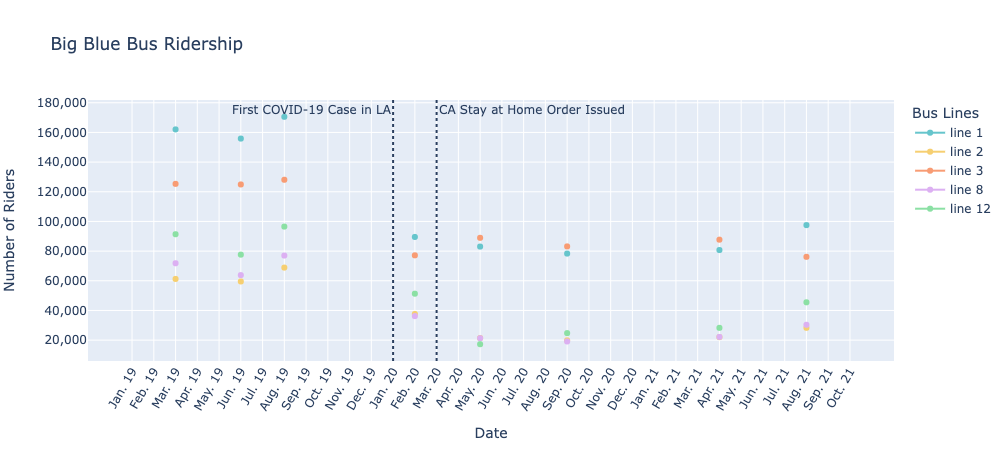

In [72]:
fig4 = px.line(smbbb, 
              labels={
                     "value": "Number of Riders",
                     "date": "Date",
                  "variable" : "Bus Lines"}, 
              title="Big Blue Bus Ridership", 
              x="date", 
              y=["line 1", "line 2", "line 3", "line 8", "line 12"], markers=True, line_shape="spline",
              color_discrete_sequence=[px.colors.qualitative.Pastel[0], px.colors.qualitative.Pastel[1], px.colors.qualitative.Pastel[2], px.colors.qualitative.Pastel[3], px.colors.qualitative.Pastel[8]],
              width=1000, height=450)

#fig4.update(layout={"title": {"x": 0.3, "y": 0.8}})
fig4.update_xaxes(tickangle=300)
#fig4.add_vline(x=12, line_dash="dot", annotation_text="First COVID-19 Case in LA")
fig4.add_vline(x=12, line_dash="dot", annotation_text="First COVID-19 Case in LA", annotation_position="top left")
fig4.add_vline(x=14, line_dash="dot", annotation_text="CA Stay at Home Order Issued", annotation_position="top right")
#fig.add_vline(x="Jan-2020", line_dash="dash", annotation_text="First Case of COVID-19 in USA", annotation_position="top right")

fig4.update_yaxes(nticks=15)
fig4.update_layout(yaxis_tickformat = ',')
#fig.update_yaxes(tickvals=["0", "2,000", "4,000", "6,000", "8,000", "10,000", "12,000", "14,000", "16,000", "18,000", "20,000"])
#fig.update_layout(hovermode="x")

config = {'responsive': True}


fig4.show(config=config)

In [73]:
write_html(fig4, "bbb-ridership.html")

### All Transports

In [74]:
transports["Santa Monica BBB"] = smbbb["total ridership"]

In [75]:
transports.head()

,date,LADOT,AVTA,Santa Clarita Transit,Santa Monica BBB
0,Jan. 19,23025.0,3600,7188,NaN
1,Feb. 19,22187.0,2930,7245,NaN
2,Mar. 19,23928.0,3289,7096,511780.54
3,Apr. 19,24341.0,4070,7499,NaN
4,May. 19,25394.0,4206,7327,NaN


In [79]:
avgs = pd.DataFrame()
avgs["date"] = ladot["date"]
avgs["LADOT"] = (transports["LADOT"]/3).round(2)
avgs["AVTA"] = transports["AVTA"]
avgs["Santa Clarita Transit"] = (transports["Santa Clarita Transit"]/2).round(2)
avgs["Big Blue Bus"] = (transports["Santa Monica BBB"]/5).round(2)

In [80]:
avgs

,date,LADOT,AVTA,Santa Clarita Transit,Big Blue Bus
0,Jan. 19,7675.00,3600,3594.0,NaN
1,Feb. 19,7395.67,2930,3622.5,NaN
2,Mar. 19,7976.00,3289,3548.0,102356.11
3,Apr. 19,8113.67,4070,3749.5,NaN
4,May. 19,8464.67,4206,3663.5,NaN
5,Jun. 19,7498.33,1876,2629.0,96350.40
6,Jul. 19,8184.33,1482,3485.5,NaN
7,Aug. 19,8245.67,3261,3510.0,108204.15
8,Sep. 19,7700.67,3209,3467.0,NaN
9,Oct. 19,8367.33,3285,4023.5,NaN


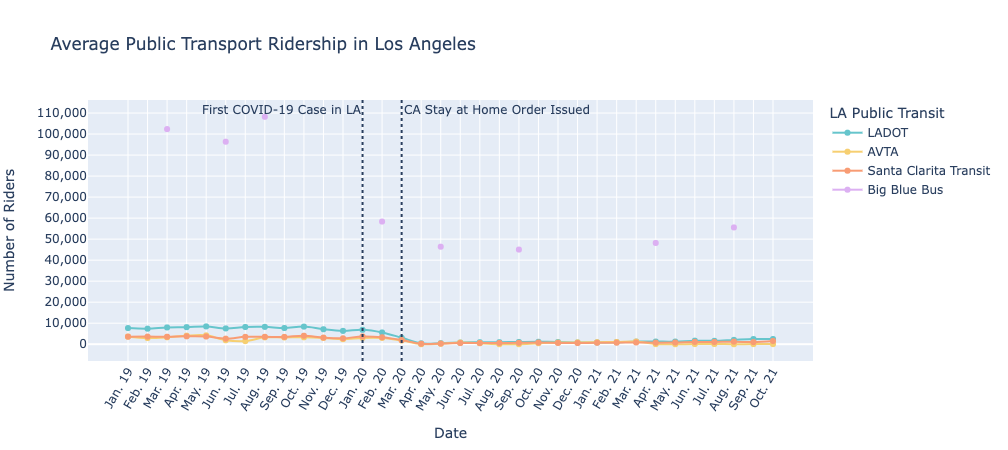

In [82]:
fig5 = px.line(avgs, 
              labels={
                     "value": "Number of Riders",
                     "date": "Date",
                  "variable" : "LA Public Transit"}, 
              title="Average Public Transport Ridership in Los Angeles", 
              x="date", 
              y=["LADOT", "AVTA", "Santa Clarita Transit", "Big Blue Bus"], markers=True, line_shape="spline",
              color_discrete_sequence=px.colors.qualitative.Pastel,
              width=1000, height=450)

#fig5.update(layout={"title": {"x": 0.28, "y": 0.8}})
fig5.update_xaxes(tickangle=300)
fig5.add_vline(x=12, line_dash="dot", annotation_text="First COVID-19 Case in LA", annotation_position="top left")
fig5.add_vline(x=14, line_dash="dot", annotation_text="CA Stay at Home Order Issued", annotation_position="top right")
#fig.add_vline(x="Jan-2020", line_dash="dash", annotation_text="First Case of COVID-19 in USA", annotation_position="top right")

fig5.update_yaxes(nticks=20)
fig5.update_layout(yaxis_tickformat = ',')
#fig.update_yaxes(tickvals=["0", "2,000", "4,000", "6,000", "8,000", "10,000", "12,000", "14,000", "16,000", "18,000", "20,000"])
#fig.update_layout(hovermode="x")

config = {'responsive': True}

fig5.show()

In [83]:
write_html(fig5, "avg-ridership.html")

### Analysis

In [84]:
ladot

,year,month,date,line 431,line 534,line 573,total ridership
0,19,1,Jan. 19,3688.0,2666.0,16671.0,23025.0
1,19,2,Feb. 19,3235.0,2427.0,16525.0,22187.0
2,19,3,Mar. 19,3544.0,2491.0,17893.0,23928.0
3,19,4,Apr. 19,3030.0,2559.0,18752.0,24341.0
4,19,5,May. 19,2956.0,2515.0,19923.0,25394.0
5,19,6,Jun. 19,3005.0,2506.0,16984.0,22495.0
6,19,7,Jul. 19,4017.0,2577.0,17959.0,24553.0
7,19,8,Aug. 19,4282.0,2393.0,18062.0,24737.0
8,19,9,Sep. 19,4455.0,2269.0,16378.0,23102.0
9,19,10,Oct. 19,3909.0,2468.0,18725.0,25102.0


In [85]:
precovid = ladot[0:14]
postcovid = ladot[14:33]

precovid, postcovid

(    year  month     date  line 431  line 534  line 573  total ridership
 0     19      1  Jan. 19    3688.0    2666.0   16671.0          23025.0
 1     19      2  Feb. 19    3235.0    2427.0   16525.0          22187.0
 2     19      3  Mar. 19    3544.0    2491.0   17893.0          23928.0
 3     19      4  Apr. 19    3030.0    2559.0   18752.0          24341.0
 4     19      5  May. 19    2956.0    2515.0   19923.0          25394.0
 5     19      6  Jun. 19    3005.0    2506.0   16984.0          22495.0
 6     19      7  Jul. 19    4017.0    2577.0   17959.0          24553.0
 7     19      8  Aug. 19    4282.0    2393.0   18062.0          24737.0
 8     19      9  Sep. 19    4455.0    2269.0   16378.0          23102.0
 9     19     10  Oct. 19    3909.0    2468.0   18725.0          25102.0
 10    19     11  Nov. 19    3056.0    2419.0   15860.0          21335.0
 11    19     12  Dec. 19    4153.0    2083.0   12768.0          19004.0
 12    20      1  Jan. 20    2651.0    2227.0   156

In [86]:
ladot_pre_mean = precovid["total ridership"].mean()

In [87]:
ladot_post_mean = postcovid["total ridership"].mean()

In [88]:
(((ladot_pre_mean - ladot_post_mean) / ladot_pre_mean)*100).round(2)

83.23

Therefore LADOT total ridership declined by about 83.2% on the onset of the COVID-19 pandemic. 

In [89]:
avta["year"] = years

In [90]:
avta

,date,line 786,year
0,Jan. 19,3600,19
1,Feb. 19,2930,19
2,Mar. 19,3289,19
3,Apr. 19,4070,19
4,May. 19,4206,19
5,Jun. 19,1876,19
6,Jul. 19,1482,19
7,Aug. 19,3261,19
8,Sep. 19,3209,19
9,Oct. 19,3285,19


In [91]:
a19 = avta[0:14]["line 786"].mean()
a20 = avta[14:33]["line 786"].mean()

((a19 - a20)/a19)*100

84.6374425566523

In [92]:
# The AVTA ridership decline by about 84 %

In [93]:
sct["years"] = years

sct19 = sct[0:14]["total ridership"].mean()
sct20 = sct[14:33]["total ridership"].mean()

((sct19 - sct20)/sct19)*100

77.29925098968371

In [94]:
# The SCT ridership declined by about 77% 

In [95]:
smbbb["years"] = years

bbb19 = smbbb[0:14]["total ridership"].mean()
bbb20 = smbbb[14:33]["total ridership"].mean()

((bbb19 - bbb20)/bbb19)*100

46.573970511584996

In [96]:
# Big Blue bus declined by about 47%